In [104]:
# library import

import datetime as dt
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sn

In [ ]:

data_bird = {"Ravel":{},"Datalake":{},"Qlik View":{}}
name_sheet = np.array(['Ravel','Datalake','Qlik View'])
for i in range(3):
    data_bird[name_sheet[i]] = pd.read_excel("dataset/BIRD - UPM.xlsx",sheet_name=i)
    

Ravel = pd.DataFrame(data_bird['Ravel'])
Ravel = Ravel.iloc[range(22),:]
Ravel.rename(columns={'Duration (in hh:mm)':'Duration'},inplace=True)

ravel_is_na = Ravel['Duration'].isna()
ravel_is_na_index = np.array(ravel_is_na[ravel_is_na==True].index)
Ravel['Duration'][ravel_is_na_index]=0
for i in range(22):
    if(Ravel['Duration'][i]!=0):
        Ravel['Duration'][i] = Ravel['Duration'][i].hour*60+ Ravel['Duration'][i].minute
                



In [116]:
# Data Lake
Datalake = pd.DataFrame(data_bird['Datalake'])
Datalake = Datalake.iloc[range(21),:]
Datalake.rename(columns={'Duration (in hh:mm)':'Duration'},inplace=True)
datalake_is_na = Datalake['Duration'].isna()
datalake_is_na_index = np.array(datalake_is_na[datalake_is_na==True].index)
Datalake['Duration'][datalake_is_na_index]=0
for i in range(Datalake.shape[0]):
    if(Datalake['Duration'][i]!=0):
        Datalake['Duration'][i] = Datalake['Duration'][i].hour*60+ Datalake['Duration'][i].minute

C:\Users\ELHADR~1\AppData\Local\Temp/ipykernel_2212/903024097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datalake['Duration'][datalake_is_na_index]=0
C:\Users\ELHADR~1\AppData\Local\Temp/ipykernel_2212/903024097.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datalake['Duration'][i] = Datalake['Duration'][i].hour*60+ Datalake['Duration'][i].minute


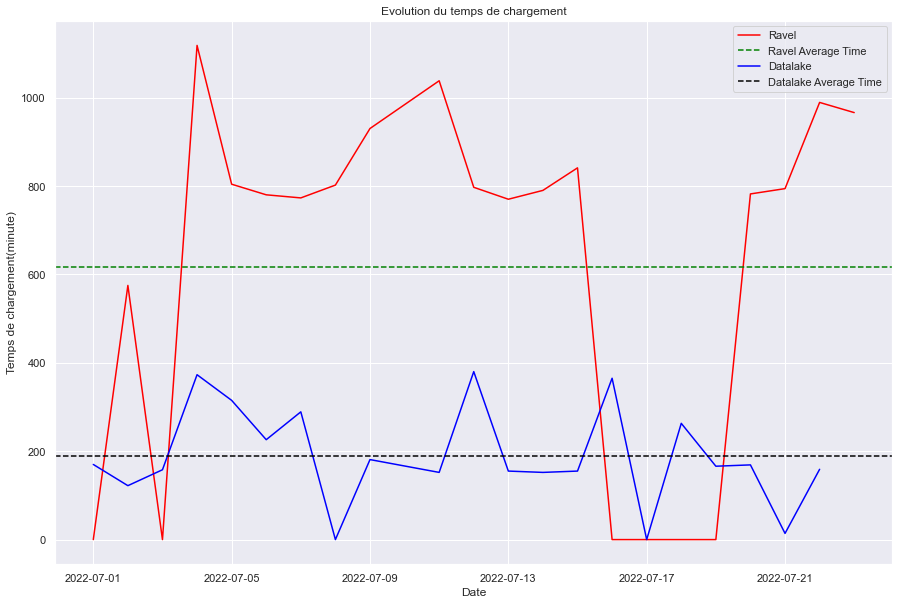

In [139]:
plt.figure(figsize=(15,10))
plt.plot(Ravel['Date/Day'],Ravel['Duration'],color="red",label='Ravel')
plt.axhline(y=np.mean(Ravel['Duration']),color="green",linestyle = '--',label="Ravel Average Time")
plt.plot(Datalake['Date/Day'],Datalake['Duration'],color="blue",label='Datalake')
plt.axhline(y=np.mean(Datalake['Duration']),color="black",label="Datalake Average Time",linestyle = '--')
plt.title("Evolution du temps de chargement")
plt.xlabel("Date")
plt.ylabel("Temps de chargement(minute)")
plt.legend()

In [66]:
test_bird = pd.read_excel("dataset/BIRD 3.0.0 - Avancement.xlsx",sheet_name=2)
test_bird = test_bird.iloc[range(test_bird.shape[0]-2),:]
test_bird['UAT_Number'] = test_bird['Nom'].str.slice(0,7)

c:\anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
c:\anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Text(0, 0.5, 'Total de script')

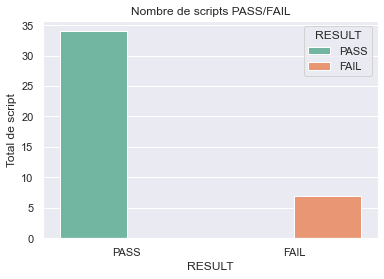

In [67]:
sn.countplot(x="RESULT", data=test_bird,hue="RESULT")
plt.title("Nombre de scripts PASS/FAIL")
plt.ylabel("Total de script")

In [42]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0, 0.5, 'Number Step')

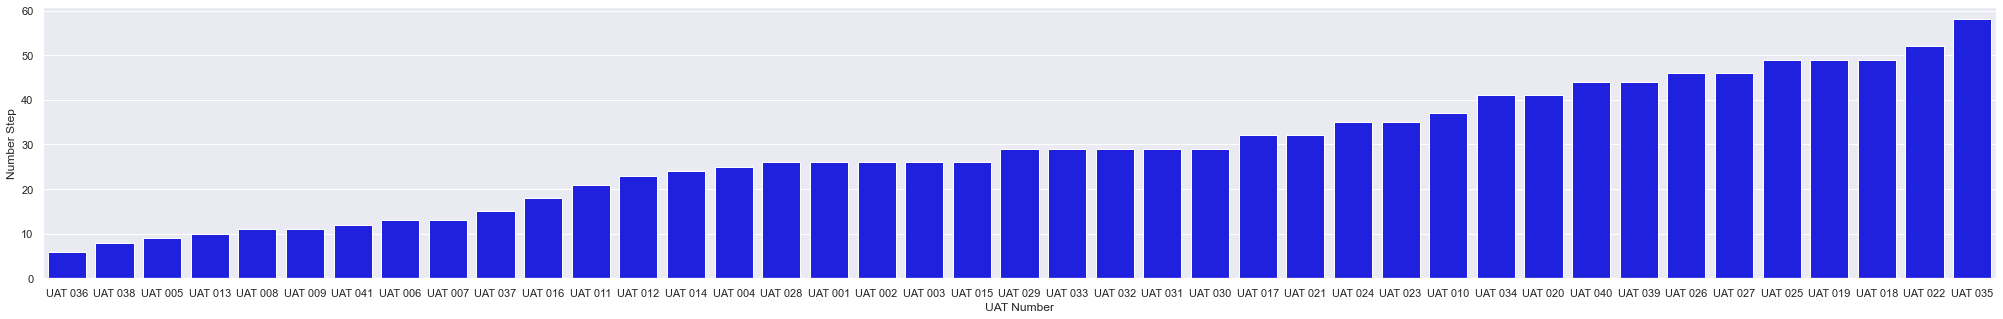

In [98]:
plt.figure(figsize=(35,5))
# the size of A4 paper
sn.barplot(x="UAT_Number",y="STEP TOTAL",data=test_bird,
order=test_bird.sort_values('STEP TOTAL').UAT_Number,color="blue")
plt.xlabel("UAT Number")
plt.ylabel("Number Step")

Text(0.5, 1.0, 'Total Step Per UAT')

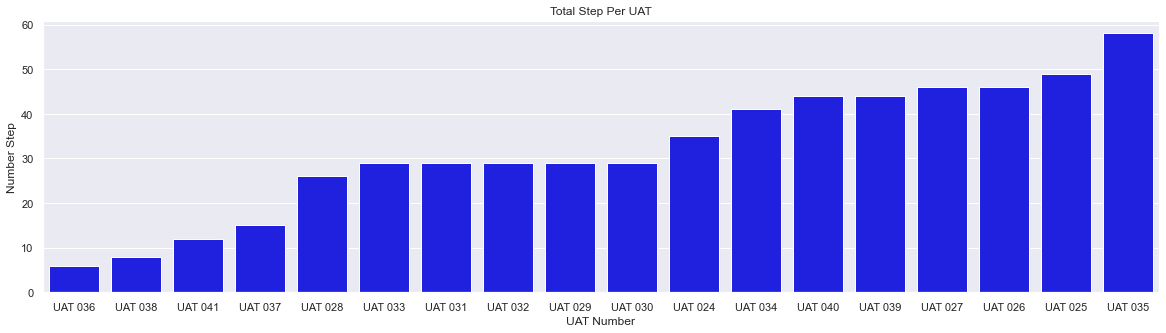

In [102]:
plt.figure(figsize=(20,5))
# the size of A4 paper
sn.barplot(x="UAT_Number",y="STEP TOTAL",data=test_bird.iloc[range(test_bird.shape[0]),:],
order=test_bird.iloc[range(23,test_bird.shape[0]),:].sort_values('STEP TOTAL').UAT_Number,color="blue")
plt.xlabel("UAT Number")
plt.ylabel("Number Step")
plt.title("Total Step Per UAT")

In [40]:
def display_bar_plot(data):
    sn.set_style('darkgrid')
    sn.set_palette('Set2')
    sn.barplot(x="UAT",y="STEP TOTAL",data=data,errwidth=0)

In [ ]:
sn.set_theme(style="darkgrid")
sn.countplot(x="RESULT", data=test_bird)

<BarContainer object of 41 artists>

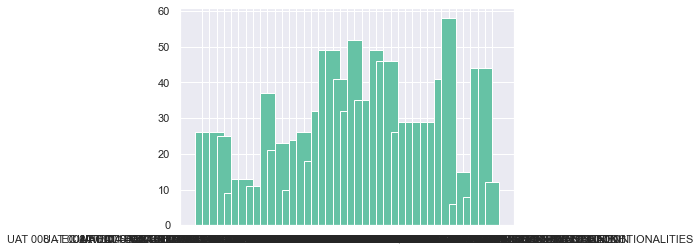

In [51]:
plt.bar(test_bird['Nom'],test_bird['STEP TOTAL'],width=2)